In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
a1=pd.read_csv('C:/Users/hp/Downloads/predice-el-futuro/train_csv.csv',parse_dates=['time'])
a1=pd.DataFrame(a1)
a1['data']='train'
a2=pd.read_csv('C:/Users/hp/Downloads/predice-el-futuro/test_csv.csv',parse_dates=['time'])
a2=pd.DataFrame(a2)
a2['data']='test'

In [3]:
a1.head()

,id,time,feature,data
0,0,2019-03-19 00:00:00,237.97,train
1,1,2019-03-19 00:00:10,57.93,train
2,2,2019-03-19 00:00:20,90.53,train
3,3,2019-03-19 00:00:30,260.75,train
4,4,2019-03-19 00:00:40,49.70,train


In [4]:
a2.dtypes

id               int64
time    datetime64[ns]
data            object
dtype: object

In [5]:
a1.shape

(80, 4)

In [6]:
a2.shape

(40, 3)

In [7]:
a1.isnull().sum()

id         0
time       0
feature    0
data       0
dtype: int64

In [8]:
data=pd.concat([a1,a2],ignore_index=True)


In [9]:
data

,data,feature,id,time
0,train,237.97,0,2019-03-19 00:00:00
1,train,57.93,1,2019-03-19 00:00:10
2,train,90.53,2,2019-03-19 00:00:20
3,train,260.75,3,2019-03-19 00:00:30
4,train,49.70,4,2019-03-19 00:00:40
...,...,...,...,...
115,test,NaN,115,2019-03-19 00:19:10
116,test,NaN,116,2019-03-19 00:19:20
117,test,NaN,117,2019-03-19 00:19:30
118,test,NaN,118,2019-03-19 00:19:40


In [10]:
data.drop(['id'],axis=1,inplace=True)

In [11]:
data.columns

Index(['data', 'feature', 'time'], dtype='object')

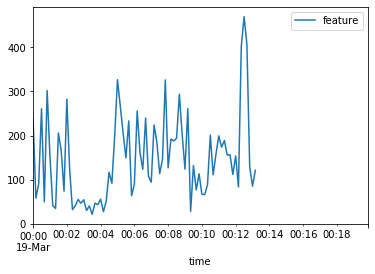

In [12]:
data.plot('time','feature')

As we see from the above plot,only minutes and seconds varies in the whole time attributes,date and other are the same throughout the data.So lets seperate minutes and seconds from this.

In [13]:
data['minutes']=(data.time.dt.minute)*60
data['seconds']=data.time.dt.second

Now we have both columns minutes and seconds are in the form of seconds,so lets add them

In [14]:
data['Total Interval']=data['minutes']+data['seconds']

In [15]:
data.head()

,data,feature,time,minutes,seconds,Total Interval
0,train,237.97,2019-03-19 00:00:00,0,0,0
1,train,57.93,2019-03-19 00:00:10,0,10,10
2,train,90.53,2019-03-19 00:00:20,0,20,20
3,train,260.75,2019-03-19 00:00:30,0,30,30
4,train,49.70,2019-03-19 00:00:40,0,40,40


In [16]:
data.drop(['time','minutes','seconds'],axis=1,inplace=True)

lets seperate train and test data

In [17]:
data_train=data.loc[data['data']=='train']
data_test=data.loc[data['data']=='test']

In [18]:
data_train.drop(['data'],axis=1,inplace=True)

In [19]:
data_train.head()

,feature,Total Interval
0,237.97,0
1,57.93,10
2,90.53,20
3,260.75,30
4,49.70,40


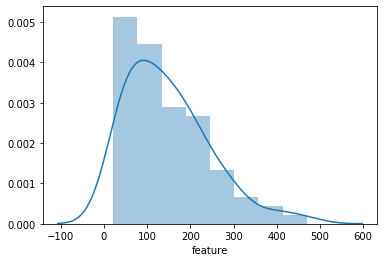

In [20]:
sns.distplot(data_train['feature'])

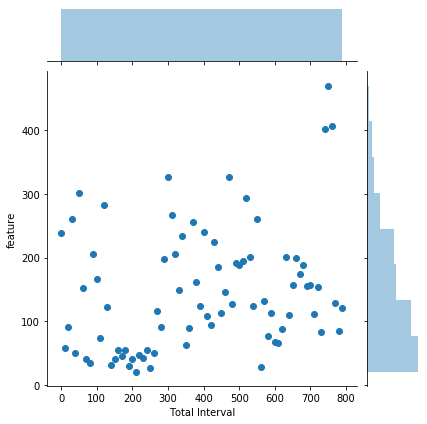

In [21]:
sns.jointplot(x='Total Interval',y='feature',data=data)

In [22]:
x=data_train['Total Interval'].values
y=data_train['feature']

In [23]:
x=x.reshape(-1,1)

In [24]:
#creating the function for detrmining random state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r2scr,'at',final_r)

In [25]:
#creating function for algorithm operations
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    print('mean_squared_error=',mean_squared_error(y_test,pred))
    print('mean_absolute_error=',mean_absolute_error(y_test,pred))
    print('r2_score=',r2_score(y_test,pred))
    print('root_mean_squared_error=',np.sqrt(mean_squared_error(y_test,pred)))

Lets apply algorithm one by one

Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
random(lr)

0.038135997795490484 at 66


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=66)
model(lr)

mean_squared_error= 9600.784955317366
mean_absolute_error= 74.62828492108181
r2_score= 0.1158324550404547
root_mean_squared_error= 97.98359533777767


Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

-0.7937220635041005 at 49


In [29]:
model(dtr)

mean_squared_error= 9711.072322222222
mean_absolute_error= 71.30925925925925
r2_score= 0.10567573234640937
root_mean_squared_error= 98.5447731857059


K-Neighbors Regressor

In [30]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,50)}
grid=GridSearchCV(knr,parameters)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 48}

In [31]:
knr=KNeighborsRegressor(n_neighbors=48)
random(knr)

0.017141741594537296 at 90


In [32]:
model(knr)

mean_squared_error= 10790.465527496463
mean_absolute_error= 75.36142746913579
r2_score= 0.006270897763090533
root_mean_squared_error= 103.87716557307705


i select Linear Regression as a algorithm as a final algorithm to apply on test data

In [33]:
data_test.drop(['data','feature'],axis=1,inplace=True)

In [34]:
test_x=data_test['Total Interval'].values
test_x=test_x.reshape(-1,1)

In [35]:
feature_pred=lr.predict(test_x)

In [36]:
feature_pred

array([176.49675981, 177.20026968, 177.90377955, 178.60728942,
       179.31079929, 180.01430916, 180.71781904, 181.42132891,
       182.12483878, 182.82834865, 183.53185852, 184.23536839,
       184.93887826, 185.64238813, 186.34589801, 187.04940788,
       187.75291775, 188.45642762, 189.15993749, 189.86344736,
       190.56695723, 191.27046711, 191.97397698, 192.67748685,
       193.38099672, 194.08450659, 194.78801646, 195.49152633,
       196.1950362 , 196.89854608, 197.60205595, 198.30556582,
       199.00907569, 199.71258556, 200.41609543, 201.1196053 ,
       201.82311518, 202.52662505, 203.23013492, 203.93364479])